# Movie Reviews - Rotten Tomatoes
The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.

test.tsv contains just phrases. You must assign a sentiment label to each phrase.

The sentiment labels are:

0 - negative,1 - somewhat negative,2 - neutral,3 - somewhat positive, 4 - positive

Task and Approach:
Like IMDb , Rotten Tomatoes is also one of the most popular website where people can find reviews and ratings for nearly any movie.
Using TF - IDF we are going Transform phrase in to a normalized tf or tf-idf representation .

TF - How many times a particular word appears in a single doc
IDF - It is calculated by taking the log of {number of docs in your corpus divided by the number of docs in which this term appears}



# Loading important Libraries

In [4]:
# %matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load

import matplotlib.pyplot as plt # Visuvalization & plotting
import seaborn as sns  #Data visualisation

import nltk # Natural Language Toolkit (statistical natural language processing (NLP) libraries )
from nltk.stem.porter import *   # Stemming 

from sklearn.model_selection import train_test_split, cross_val_score
                                    # train_test_split - Split arrays or matrices into random train and test subsets
                                    # cross_val_score - Evaluate a score by cross-validation

from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier model to predict sentiment

from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer converts collection of text docs to a matrix of token counts

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

# Loading Data

In [5]:
train_MR = pd.read_csv("D:\\Data_science_project\\Data_science_project\\text_mining\\Case 1\\train.tsv",sep="\t") # Train Moview Reviews 
test_MR = pd.read_csv("D:\\Data_science_project\\Data_science_project\\text_mining\\Case 1\\test.tsv",sep="\t")

# Describe the data

In [6]:
print('Train Data - ', train_MR.shape)
train_MR.head()

Train Data -  (156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
print('Test Data - ', test_MR.shape)
test_MR.shape

Test Data -  (66292, 3)


(66292, 3)

In [8]:
train_MR.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


We can see from the mean sentiment showing as nearly 2 and max is 4 .

Same thing we can visually see this using plots

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

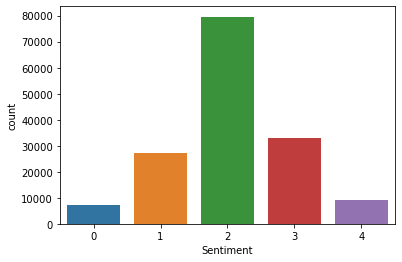

In [9]:
sns.countplot(data=train_MR,x='Sentiment')

Here We can see the distribution of the counts

In [10]:
dist = train_MR.groupby(["Sentiment"]).size()
print(dist)

dist_Percentage = round((dist / dist.sum())*100,2)
print(dist_Percentage)

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
dtype: int64
Sentiment
0     4.53
1    17.48
2    50.99
3    21.10
4     5.90
dtype: float64


In [11]:
train_MR['Length'] = train_MR['Phrase'].apply(lambda x: len(str(x).split(' ')))   ## Will get the length of each phrase 
test_MR['Length'] = test_MR['Phrase'].apply(lambda x: len(str(x).split(' '))) 

train_MR.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1


In [12]:
train_MR.isnull().sum() 

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
Length        0
dtype: int64

In [13]:
test_MR.isnull().sum() 

PhraseId      0
SentenceId    0
Phrase        0
Length        0
dtype: int64

# PreProcessing of Text
Combining datasets

Since we are applying each function or transformation seperatly we can combine (train & Test) both the data sets and we can apply preprocess setps

We can categorize as train & Test

In [14]:
train_MR['cat'] = 'TRAIN'
test_MR['cat'] = 'TEST'

In [15]:
train_test = train_MR.append(test_MR, ignore_index=True)
train_test.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat
0,1,1,A series of escapades demonstrating the adage ...,1.0,37,TRAIN
1,2,1,A series of escapades demonstrating the adage ...,2.0,14,TRAIN
2,3,1,A series,2.0,2,TRAIN
3,4,1,A,2.0,1,TRAIN
4,5,1,series,2.0,1,TRAIN


# Remove special characters, numbers, punctuations

In [16]:
train_test['PreProcess_Sentence'] = train_test['Phrase'].str.replace("[^a-zA-Z#]", " ")

Removing short words - length 3 or less ( are, hmm, is ,A , THE)

It split the sentence and remove the length less than 3

In [18]:
train_test['PreProcess_Sentence'] = train_test['PreProcess_Sentence'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train_test.head()

,PhraseId,SentenceId,Phrase,Sentiment,Length,cat,PreProcess_Sentence
0,1,1,A series of escapades demonstrating the adage ...,1.0,37,TRAIN,series escapades demonstrating adage that what...
1,2,1,A series of escapades demonstrating the adage ...,2.0,14,TRAIN,series escapades demonstrating adage that what...
2,3,1,A series,2.0,2,TRAIN,series
3,4,1,A,2.0,1,TRAIN,
4,5,1,series,2.0,1,TRAIN,series


# Converting all lower letters

In [19]:
train_test['PreProcess_Sentence'] = train_test['PreProcess_Sentence'].str.lower()
train_test['PreProcess_Sentence'].head()

0    series escapades demonstrating adage that what...
1    series escapades demonstrating adage that what...
2                                               series
3                                                     
4                                               series
Name: PreProcess_Sentence, dtype: object

# Tokenization
Tokens are usually individual words and "tokenization" is taking a text or set of text and breaking it up into its individual words

In [20]:
train_test['tokenized_words'] = train_test['PreProcess_Sentence'].apply(lambda x: x.split())
train_test.tokenized_words.head()

0    [series, escapades, demonstrating, adage, that...
1    [series, escapades, demonstrating, adage, that...
2                                             [series]
3                                                   []
4                                             [series]
Name: tokenized_words, dtype: object

# Stemming
Convert the words like counting,counted ,counts just as count
Many variations of words carry the same meaning, other than when tense is involved
One of the most popular stemming algorithms is the Porter stemmer

In [21]:
stemming = PorterStemmer() 
train_test['tokenized_words'] = train_test.tokenized_words.apply(lambda x: [stemming.stem(i) for i in x]) # stemming
print(train_test.tokenized_words.head())

0    [seri, escapad, demonstr, adag, that, what, go...
1    [seri, escapad, demonstr, adag, that, what, go...
2                                               [seri]
3                                                   []
4                                               [seri]
Name: tokenized_words, dtype: object


# TF-IDF usage
Countvectorizer gives equal weightage to all the words, i.e. a word is converted to a column
TF-IDF is different from countvectorizer.
vocabulary_ just gives a dict of indexes of the words.

In [22]:
corpus = train_test.PreProcess_Sentence  ## Collection of documents 
vectorizer = TfidfVectorizer(stop_words='english',analyzer='word')
print(vectorizer)

X = vectorizer.fit_transform(corpus)
print(X[:5]) 

TfidfVectorizer(stop_words='english')
  (0, 14152)	0.16241099625722435
  (0, 478)	0.2885844618487239
  (0, 487)	0.3435146841976645
  (0, 10033)	0.24130021014648553
  (0, 6053)	0.3465145071491743
  (0, 6318)	0.29988201399838676
  (0, 6302)	0.33193991688260005
  (0, 156)	0.3280143224723143
  (0, 3726)	0.3246981720495354
  (0, 4937)	0.3625923955084087
  (0, 12997)	0.22233391246874676
  (1, 6318)	0.41934234011258803
  (1, 6302)	0.23208537862340137
  (1, 156)	0.4586813718568841
  (1, 3726)	0.45404420719364774
  (1, 4937)	0.5070338884690269
  (1, 12997)	0.31090235088768325
  (2, 12997)	1.0
  (4, 12997)	1.0


In [23]:
idf = vectorizer.idf_
print(idf)

[10.42164973 10.74707213  9.1531384  ... 10.53943277 10.36758251
 11.52026202]


In [24]:
vectorizer.vocabulary_

{'series': 12997,
 'escapades': 4937,
 'demonstrating': 3726,
 'adage': 156,
 'good': 6302,
 'goose': 6318,
 'gander': 6053,
 'occasionally': 10033,
 'amuses': 487,
 'amounts': 478,
 'story': 14152,
 'quiet': 11572,
 'introspective': 7786,
 'entertaining': 4845,
 'independent': 7435,
 'worth': 16583,
 'seeking': 12906,
 'fans': 5337,
 'ismail': 7871,
 'merchant': 9202,
 'work': 16553,
 'suspect': 14516,
 'hard': 6672,
 'time': 15005,
 'sitting': 13346,
 'positively': 11036,
 'thrilling': 14950,
 'combination': 2686,
 'ethnography': 4983,
 'intrigue': 7773,
 'betrayal': 1304,
 'deceit': 3560,
 'murder': 9630,
 'shakespearean': 13072,
 'tragedy': 15166,
 'juicy': 8054,
 'soap': 13589,
 'opera': 10123,
 'aggressive': 310,
 'self': 12929,
 'glorification': 6252,
 'manipulative': 8941,
 'whitewash': 16392,
 'comedy': 2702,
 'drama': 4335,
 'nearly': 9769,
 'epic': 4888,
 'proportions': 11365,
 'rooted': 12456,
 'performance': 10627,
 'title': 15040,
 'character': 2230,
 'undergoing': 15541,

In [25]:
vectorizer.get_feature_names()

['aaliyah',
 'abagnale',
 'abandon',
 'abandoned',
 'abandons',
 'abbas',
 'abbass',
 'abbott',
 'abbreviated',
 'abderrahmane',
 'abdul',
 'abel',
 'aberration',
 'abhorrent',
 'abhors',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'able',
 'ably',
 'abomination',
 'aborbing',
 'aboriginal',
 'aborted',
 'aboul',
 'abound',
 'abrahams',
 'abrams',
 'abrasive',
 'abridged',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'absorption',
 'abstract',
 'absurd',
 'absurdist',
 'absurdities',
 'absurdity',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abusers',
 'abuses',
 'abysmal',
 'abysmally',
 'abyss',
 'academic',
 'academy',
 'accelerated',
 'accent',
 'accents',
 'accentuating',
 'accept',
 'acceptable',
 'acceptance',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'acclaim',
 'acclaimed',
 'accommodate',
 '

In [26]:
col = ['feat_'+ i for i in vectorizer.get_feature_names()]
print(col[1:5])
print(X[1:5])

['feat_abagnale', 'feat_abandon', 'feat_abandoned', 'feat_abandons']
  (0, 6318)	0.41934234011258803
  (0, 6302)	0.23208537862340137
  (0, 156)	0.4586813718568841
  (0, 3726)	0.45404420719364774
  (0, 4937)	0.5070338884690269
  (0, 12997)	0.31090235088768325
  (1, 12997)	1.0
  (3, 12997)	1.0


# END OF NOTEBOOK